# 数据分析
计算目标:每辆出租车的里程利用率、时间利用率、总空驶时间
存储在`taxi_df`中

In [1]:
# 模块导入
import pandas as pd
import matplotlib.pyplot as plt
# plt设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
trip_df_path = ['trip_df_morning', 'trip_df_noon', 'trip_df_night']

In [3]:
def analysis(trip_df_path, name = 'trip_df_default'):
    # 数据读取
    trip_df = pd.read_pickle(trip_df_path)
    # 异常值检查:
    print(len(trip_df[trip_df['distance'] == 0])) # 轨迹长度为0
    print(len(trip_df[trip_df['start_time'] == trip_df['end_time']])) # 行程时间为0

    """ 
    根据trip_df中的数据，计算每辆出租车的里程利用率、时间利用率、总空驶时间，
    并将结果保存到taxi_df中

    taxi_df 说明：

        taxi_id: 出租车id
        mileage_utilization: 里程利用率
        time_utilization: 时间利用率
        empty_time: 总空驶时间
    """

    taxi_df = pd.DataFrame(columns=['taxi_id', 'mileage_utilization', 'time_utilization', 'empty_time'])
    for taxi_id in trip_df['taxi_id'].unique():
        # 计算每辆出租车的里程利用率、时间利用率、总空驶时间
        mileage_utilization = trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['distance'].sum() / \
            trip_df[trip_df['taxi_id']==taxi_id]['distance'].sum()
        time_utilization = (trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['end_time'].sum() - \
                            trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['start_time'].sum()) / \
                                (trip_df[trip_df['taxi_id']==taxi_id]['end_time'].sum() - \
                                trip_df[trip_df['taxi_id']==taxi_id]['start_time'].sum())
        empty_time = trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==0)]['end_time'].sum() - \
            trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==0)]['start_time'].sum()
        # 将计算结果记录到taxi_df中
        new_row = pd.DataFrame({'taxi_id': taxi_id, 'mileage_utilization': mileage_utilization, 'time_utilization': time_utilization, 'empty_time': empty_time}, index=[0])
        taxi_df = pd.concat([taxi_df, new_row], ignore_index=True)
        
    # 保存taxi_df如csv文件
    taxi_df.to_csv(name.replace('trip_df', 'taxi_df') + '.csv', index=False)
    # 根据trip_df中的time_s对轨迹进行分类(24小时内的轨迹)

    # 创建一个time_distribution数组，包含24个元素，每个元素代表一个小时内的轨迹数
    time_distribution = [0 for i in range(24)]
    for i in range(trip_df.shape[0]):
        if trip_df.iloc[i]['passenger'] == 0:
            continue
        time_distribution[int(trip_df.iloc[i]['start_time'] / 3600)] += 1
    print(time_distribution)
    # 画出time_distribution的柱状图
    plt.title('成都市打车需求量的时间分布')
    plt.xlabel('时间/时')
    plt.ylabel('打车需求量/次')
    plt.xticks(range(24)) # 调整x轴的刻度
    plt.bar(range(24), time_distribution)
    

0
0
[0, 0, 0, 0, 0, 0, 0, 7699, 5861, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20717, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26152, 20108, 0, 0, 0, 0, 0]


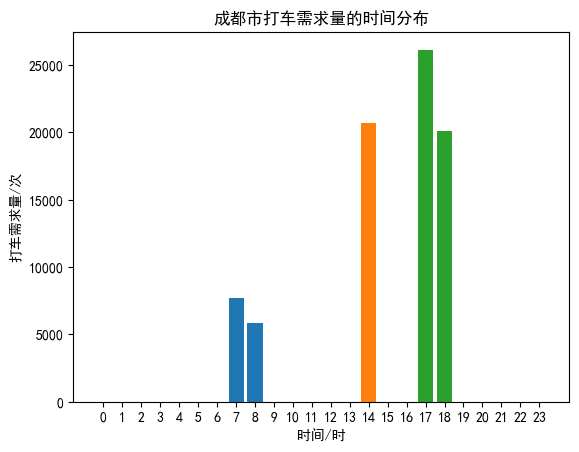

In [4]:
for path in trip_df_path:
    # 删除path前的 "taxi_df_" 
    analysis(path+'.pkl',path.replace("taxi_df_",""))
plt.savefig('成都市打车需求量的时间分布.png',dpi=300,bbox_inches='tight')

计算目标:成都市一天内的打车需求时间分布



可以根据`trip_df`中每单的起始时间，根据24小时进行分布统计，得到一天内的打车需求时间分布

计算目标:成都市一天内的打车需求地区分布